<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Lasso Regression
</h1><center/>

**Link to the article** :  https://medium.com/@soulawalid/l1-regularization-lasso-regression-a59728ac68d8?sk=d0f22749f80ecca6b4a65e0b86779ffe

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Generate some data
X = np.random.rand(100, 1) * 10  # 100 data points between 0 and 10
y = 3 * X.squeeze() + np.random.randn(100) * 2  # Linear relationship with noise

# Convert to DataFrame for easy handling
df = pd.DataFrame({'X': X.squeeze(), 'y': y})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
X.shape

(100, 1)

In [4]:
df

,X,y
0,3.651773,12.297715
1,0.448018,4.098857
2,5.696413,14.849320
3,4.939061,13.674381
4,7.052131,23.162990
...,...,...
95,6.295345,16.252299
96,0.803199,3.311486
97,4.769200,17.498175
98,9.506435,26.627819


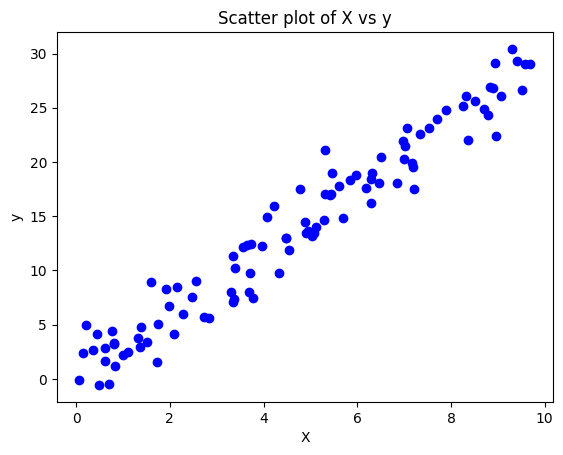

In [5]:
# Optional
plt.scatter(X, y, color='blue')
plt.title('Scatter plot of X vs y')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [6]:
# Initialize the Lasso model with alpha (regularization strength)
lasso = Lasso(alpha=0.1)

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Predict on the test data
y_pred = lasso.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 3.27


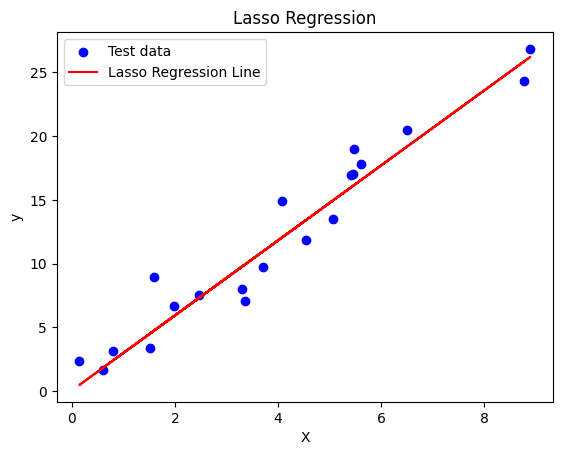

In [7]:
# Plot the data points
plt.scatter(X_test, y_test, color='blue', label='Test data')

# Plot the Lasso regression line
plt.plot(X_test, y_pred, color='red', label='Lasso Regression Line')

plt.title('Lasso Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Test with another Alpha Value

Mean Squared Error: 3.18


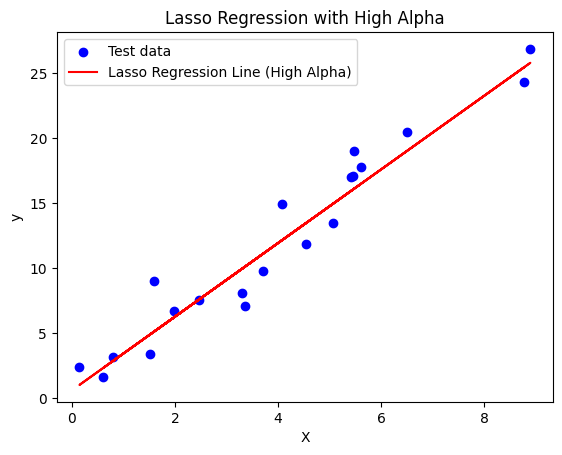

In [8]:
# Try with a higher alpha
lasso_high_alpha = Lasso(alpha=1.0)
lasso_high_alpha.fit(X_train, y_train)
y_pred_high_alpha = lasso_high_alpha.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_high_alpha)
print(f"Mean Squared Error: {mse:.2f}")

# Plot with higher alpha
plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.plot(X_test, y_pred_high_alpha, color='red', label='Lasso Regression Line (High Alpha)')
plt.title('Lasso Regression with High Alpha')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Gridsearch

In [9]:
from sklearn.model_selection import GridSearchCV

# Define the model
lasso = Lasso()

# Define the grid of alpha values
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV
grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_lasso = grid_search.best_estimator_

# Predict and calculate MSE
y_pred = best_lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Results
print("Best alpha:", grid_search.best_params_['alpha'])
print("Mean Squared Error:", mse)

Best alpha: 0.001
Mean Squared Error: 3.2866539164609194


In [10]:
best_lasso

Lasso(alpha=0.001)